<a href="https://colab.research.google.com/github/umesh2908/Machine-learning-projects/blob/master/LSTMTimeseriesforecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving forecast_data.xlsx to forecast_data.xlsx


In [0]:
import io
df=pd.read_excel(io.BytesIO(uploaded['forecast_data.xlsx']))

In [4]:
df.head()

,REGION_NAME,ZONE_NAME,CIRCLE_NAME,DIVISION_NAME,SUBDIVISION_NAME,FEEDER_BU,SUBSTATION_CODE,FEEDER_CODE,SUBSTATION_NAME,FEEDER_NAME,METER_SR_NO,MF,MAKE_CODE,DAYPROFILE,DAYPROFILE_DATE,INTERVAL,RPH_VOLT,YPH_VOLT,BPH_VOLT,RPH_LCURR,YPH_LCURR,BPH_LCURR,ACTIVE_ENERGY,KW,REACTIVE_ENERGY,APPERENT_ENERGY,ACTIVE_DEMAND,REACTIVE_DEMAND,APPERENT_DEMAND,FILE_SRC
0,KOKAN REGION,JALGAON ZONE,DHULE CIRCLE,DHULE RURAL DIVISION,PIMPALNER,582,94007,201,33/11 KV PIMPALNER,11 KV DEGAON,7424374,80,53,2018-04-01 00:00:00,01-APR-18 12.00.00.000000000 AM,1,6352.94,6470.58,6352.94,1.233,1.277,1.267,10.20,816.0,6.64,12.18,NaN,NaN,NaN,AMR
1,KOKAN REGION,JALGAON ZONE,DHULE CIRCLE,DHULE RURAL DIVISION,PIMPALNER,582,94007,201,33/11 KV PIMPALNER,11 KV DEGAON,7424374,80,53,2018-04-01 00:30:00,01-APR-18 12.30.00.000000000 AM,2,6470.58,6470.58,6352.94,1.293,1.341,1.328,10.76,860.8,7.13,12.91,NaN,NaN,NaN,AMR
2,KOKAN REGION,JALGAON ZONE,DHULE CIRCLE,DHULE RURAL DIVISION,PIMPALNER,582,94007,201,33/11 KV PIMPALNER,11 KV DEGAON,7424374,80,53,2018-04-01 01:00:00,01-APR-18 01.00.00.000000000 AM,3,6470.58,6588.23,6470.58,1.332,1.384,1.369,11.15,892.0,7.48,13.42,NaN,NaN,NaN,AMR
3,KOKAN REGION,JALGAON ZONE,DHULE CIRCLE,DHULE RURAL DIVISION,PIMPALNER,582,94007,201,33/11 KV PIMPALNER,11 KV DEGAON,7424374,80,53,2018-04-01 01:30:00,01-APR-18 01.30.00.000000000 AM,4,6470.58,6588.23,6470.58,1.349,1.396,1.380,11.24,899.2,7.58,13.55,NaN,NaN,NaN,AMR
4,KOKAN REGION,JALGAON ZONE,DHULE CIRCLE,DHULE RURAL DIVISION,PIMPALNER,582,94007,201,33/11 KV PIMPALNER,11 KV DEGAON,7424374,80,53,2018-04-01 02:00:00,01-APR-18 02.00.00.000000000 AM,5,6588.23,6588.23,6470.58,1.378,1.422,1.407,11.49,919.2,7.79,13.89,NaN,NaN,NaN,AMR


In [0]:
df['DAYPROFILE'] = pd.to_datetime(df.DAYPROFILE,format='%d-%m-%Y %H:%M:%S') 

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<Figure size 720x360 with 0 Axes>

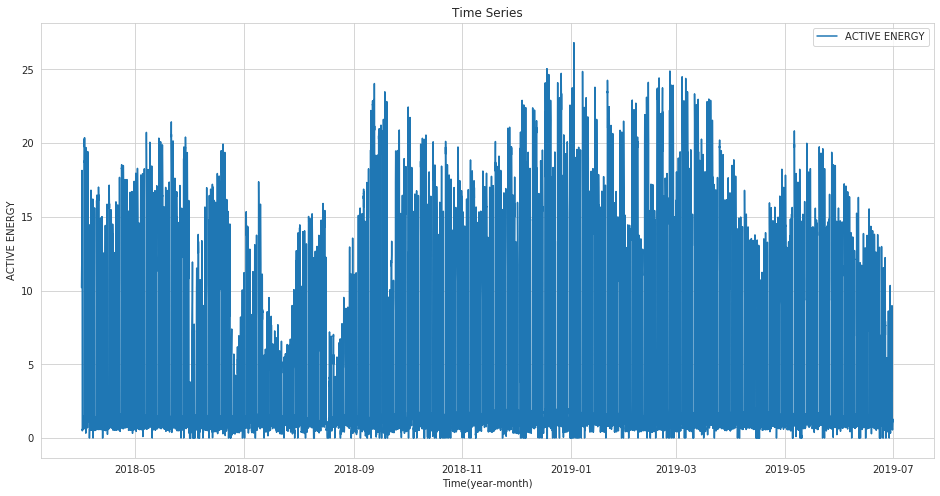

In [6]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
df.index = df['DAYPROFILE'] # indexing the Datetime to get the time period on the x-axis. 
ts = df['ACTIVE_ENERGY']
plt.figure(figsize=(16,8)) 
plt.plot(ts, label='ACTIVE ENERGY') 
plt.title('Time Series') 
plt.xlabel("Time(year-month)") 
plt.ylabel("ACTIVE ENERGY") 
plt.legend(loc='best')

In [0]:
train=pd.DataFrame({'Datetime':df['DAYPROFILE'],'ACTIVE_ENERGY':df['ACTIVE_ENERGY']})

In [8]:
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 
# Hourly time series 
hourly = train.resample('H').mean() 
# Converting to daily mean 
daily = train.resample('D').mean() 
# Converting to weekly mean 
weekly = train.resample('W').mean() 
# Converting to monthly mean 
monthly = train.resample('M').mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


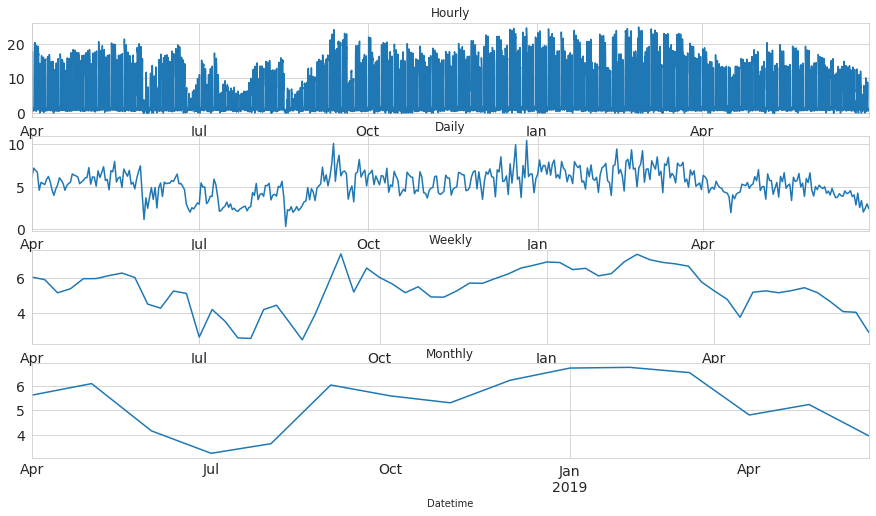

In [9]:
fig, axs = plt.subplots(4,1) 
hourly.ACTIVE_ENERGY.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0]) 
daily.ACTIVE_ENERGY.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1]) 
weekly.ACTIVE_ENERGY.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2])
monthly.ACTIVE_ENERGY.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3]) 

In [10]:
train.shape

(21888, 2)

In [11]:
Train=train.ix['01-04-2018':'31-05-2019'] 
valid=train.ix['06-01-2019':'07-31-2019']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


In [12]:
Train.shape,valid.shape

((20448, 2), (1440, 2))

In [13]:
Train

,Datetime,ACTIVE_ENERGY
Datetime,,
2018-04-01 00:00:00.000,2018-04-01 00:00:00.000,10.20
2018-04-01 00:30:00.000,2018-04-01 00:30:00.000,10.76
2018-04-01 01:00:00.000,2018-04-01 01:00:00.000,11.15
2018-04-01 01:30:00.000,2018-04-01 01:30:00.000,11.24
2018-04-01 02:00:00.000,2018-04-01 02:00:00.000,11.49
...,...,...
2019-05-31 21:30:00.001,2019-05-31 21:30:00.001,1.21
2019-05-31 22:00:00.001,2019-05-31 22:00:00.001,1.14
2019-05-31 22:30:00.001,2019-05-31 22:30:00.001,2.14


In [0]:
train_hourly = Train.resample('H').mean() 
Valid_hourly=valid.resample('H').mean()

In [15]:
Valid_hourly

,ACTIVE_ENERGY
Datetime,
2019-06-01 00:00:00,10.410
2019-06-01 01:00:00,9.240
2019-06-01 02:00:00,8.845
2019-06-01 03:00:00,8.470
2019-06-01 04:00:00,7.615
...,...
2019-06-30 19:00:00,1.195
2019-06-30 20:00:00,1.255
2019-06-30 21:00:00,1.180


In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

training_scaled = scaler.fit_transform(train_hourly)

In [0]:
features_set = []
labels = []
for i in range(48, 10224):
    features_set.append(training_scaled[i-48:i, 0])
    labels.append(training_scaled[i, 0])

In [0]:
features_set, labels = np.array(features_set), np.array(labels)

In [0]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [22]:
model = Sequential()

In [23]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))

In [24]:
model.add(Dropout(0.2))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

In [0]:
model.add(Dense(units = 1))

In [0]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [30]:
history=model.fit(features_set, labels, epochs = 30, batch_size = 32,validation_split=0.1,  shuffle=False)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 9158 samples, validate on 1018 samples
Epoch 1/30





9158/9158 [==============================] - 48s 5ms/step - loss: 0.0536 - val_loss: 0.0403
Epoch 2/30
9158/9158 [==============================] - 44s 5ms/step - loss: 0.0354 - val_loss: 0.0305
Epoch 3/30
9158/9158 [==============================] - 44s 5ms/step - loss: 0.0296 - val_loss: 0.0263
Epoch 4/30
9158/9158 [==============================] - 44s 5ms/step - loss: 0.0250 - val_loss: 0.0215
Epoch 5/30
9158/9158 [==============================] - 44s 5ms/step - loss: 0.0195 - val_loss: 0.0177
Epoch 6/30
9158/9158 [==============================] - 45s 5ms/step - loss: 0.0176 - val_loss: 0.0155
Epoch 7/30
9158/9158 [==============================] - 44s 5ms/step - loss: 0.0167 - val_loss: 0.0154
Epoch 8/30
9158/9158 [==============================] - 44s 5ms/step - loss: 0.0159 - val_loss: 0.0142
Epoch 9/30
9158/9158 [====

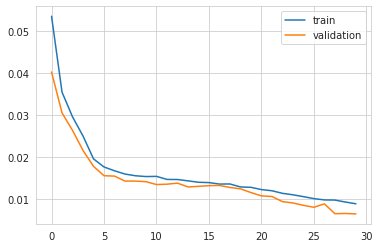

In [31]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.legend()
plt.show()




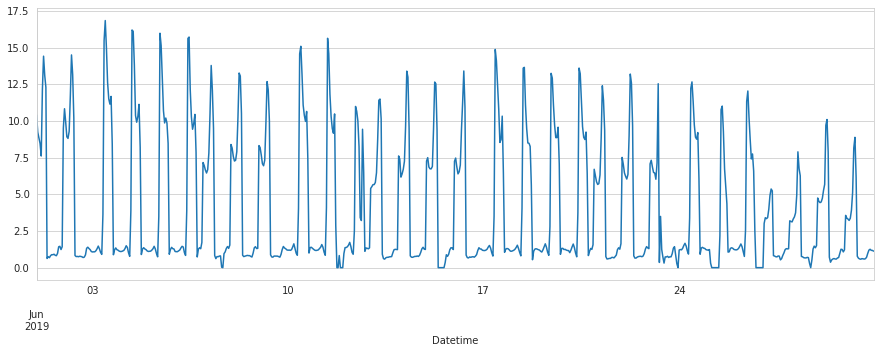

In [32]:
Valid_hourly['ACTIVE_ENERGY'].plot(figsize=(15,5)) 

In [0]:
total = pd.concat((train_hourly['ACTIVE_ENERGY'], Valid_hourly['ACTIVE_ENERGY']), axis=0)

In [0]:
test_inputs = total[len(total) - len(Valid_hourly) - 48:].values

In [0]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

In [0]:
test_features = []
for i in range(48, 720):
    test_features.append(test_inputs[i-48:i, 0])

In [0]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

In [0]:
predictions = model.predict(test_features)

In [0]:
predictions = scaler.inverse_transform(predictions)

In [40]:
predictions.shape,Valid_hourly.shape

((672, 1), (720, 1))

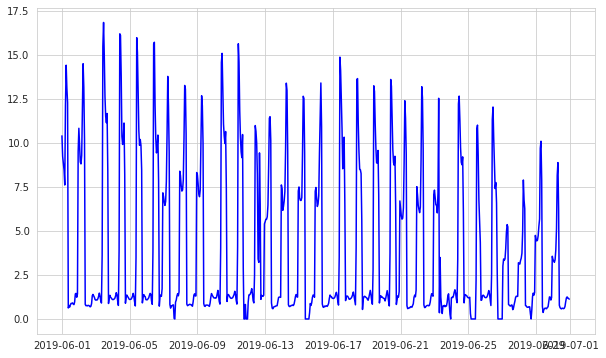

In [41]:
plt.figure(figsize=(10,6))
plt.plot(Valid_hourly, color='blue', label='Actual active energy')


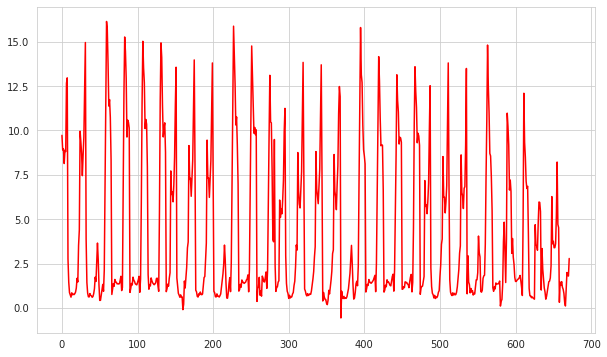

In [42]:
plt.figure(figsize=(10,6))
plt.plot(predictions , color='red', label='Predicted active energy')

In [43]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Valid_hourly['ACTIVE_ENERGY'][0:672],predictions)

2.6568004800166873

In [44]:
Valid_hourly['ACTIVE_ENERGY'][0:672]

Datetime
2019-06-01 00:00:00    10.410
2019-06-01 01:00:00     9.240
2019-06-01 02:00:00     8.845
2019-06-01 03:00:00     8.470
2019-06-01 04:00:00     7.615
                        ...  
2019-06-28 19:00:00     1.270
2019-06-28 20:00:00     1.470
2019-06-28 21:00:00     1.355
2019-06-28 22:00:00     1.505
2019-06-28 23:00:00     4.750
Freq: H, Name: ACTIVE_ENERGY, Length: 672, dtype: float64

In [48]:
predictions[0:10]

array([[ 9.722048 ],
       [ 8.898202 ],
       [ 8.959585 ],
       [ 8.134768 ],
       [ 8.882922 ],
       [ 8.807425 ],
       [12.661592 ],
       [12.961041 ],
       [ 2.770349 ],
       [ 1.4531453]], dtype=float32)

In [46]:
from sklearn.metrics import r2_score
r2_score(Valid_hourly['ACTIVE_ENERGY'][0:672],predictions)

0.860355878624855